In [181]:
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
#Load data
county_facts = pd.read_csv('../kaggle-data/county_facts.csv', index_col=['fips', 'area_name'])
county_facts_columns = pd.read_csv('../kaggle-data/county_facts_dictionary.csv')
primary_results = pd.read_csv('../kaggle-data/primary_results.csv')

In [4]:
#Take a look at the columns
county_facts_columns

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [199]:
#Subselect rows, let's just keep state level data
#df = county_facts[county_facts.state_abbreviation.isnull()][1:]
#Subselect at the county level
df = county_facts[county_facts.state_abbreviation.notnull()]
df.head()

,,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,area_name,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,76.3,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,96.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


In [200]:
#Select 2 columns (this is for visualization purposes)
#df = df.filter(['EDU685213', 'SEX255214'])
df = df.filter(['SBO315207', 'SBO015207'])

In [201]:
#Rename columns to use their meaning instead their codename
col_names = dict((k, v) for k,v in county_facts_columns.itertuples(index=False, name=None))
df.rename(columns=col_names, inplace=True)
df.head()

,,"Black-owned firms, percent, 2007","Women-owned firms, percent, 2007"
fips,area_name,,
1001,Autauga County,15.2,31.7
1003,Baldwin County,2.7,27.3
1005,Barbour County,0.0,27.0
1007,Bibb County,14.9,0.0
1009,Blount County,0.0,23.2


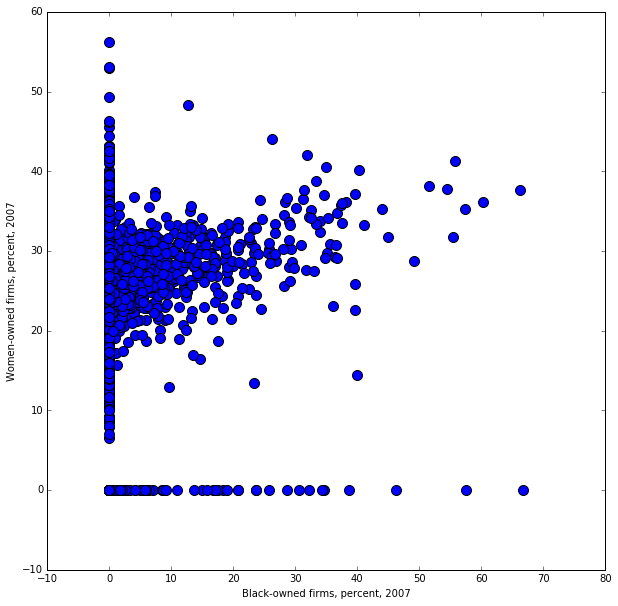

In [202]:
df.plot.scatter(0, 1, s=100)

In [204]:
#Run a clustering algorithm, group in 4 clusters
model = KMeans(n_clusters=4)
results = model.fit_predict(df.values)

In [205]:
#Assign cluster number to our dataframe
df['cluster'] = results
#Add a color for each cluster
df['color'] = df.cluster.map({0: 'black', 1:'red', 2:'green', 3:'yellow'})

In [206]:
df.head()

,,"Black-owned firms, percent, 2007","Women-owned firms, percent, 2007",cluster,color
fips,area_name,,,,
1001,Autauga County,15.2,31.7,0,black
1003,Baldwin County,2.7,27.3,1,red
1005,Barbour County,0.0,27.0,1,red
1007,Bibb County,14.9,0.0,2,green
1009,Blount County,0.0,23.2,3,yellow


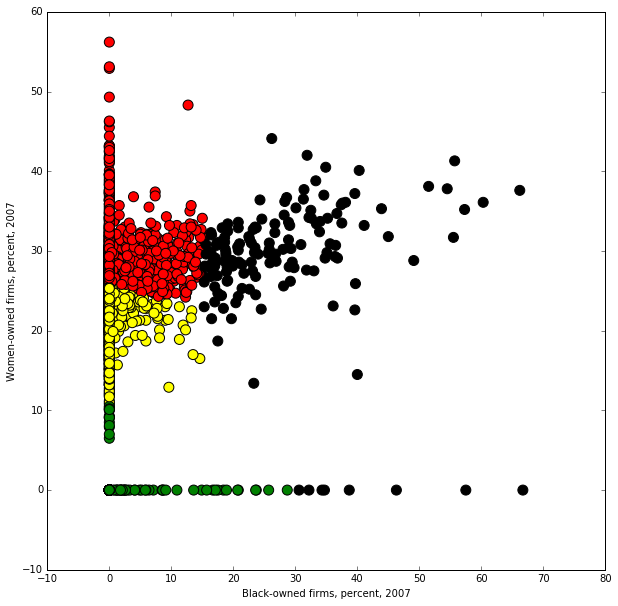

In [207]:
df.plot.scatter(x=0, y=1, s=100, c=df.color)